In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly_express as px

import wordcloud 

import nltk

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../dataset/spam.csv", encoding='latin-1')

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

df.rename(columns = {'v1':'class_label','v2':'message'},inplace=True)

In [5]:
df.head()

class_label                                            message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
df.describe()

class_label                 message
count         5572                    5572
unique           2                    5169
top            ham  Sorry, I'll call later
freq          4825                      30

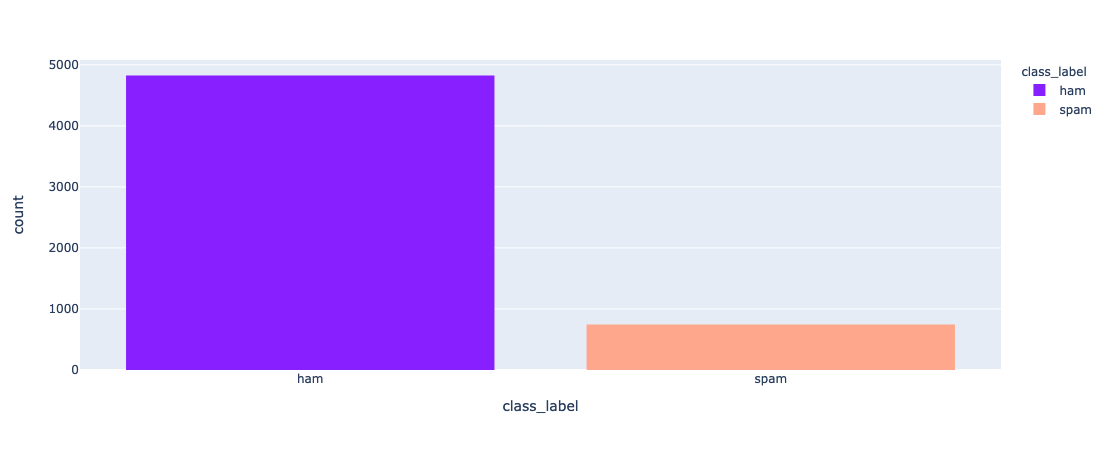

In [7]:
fig = px.histogram(df, x="class_label", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()

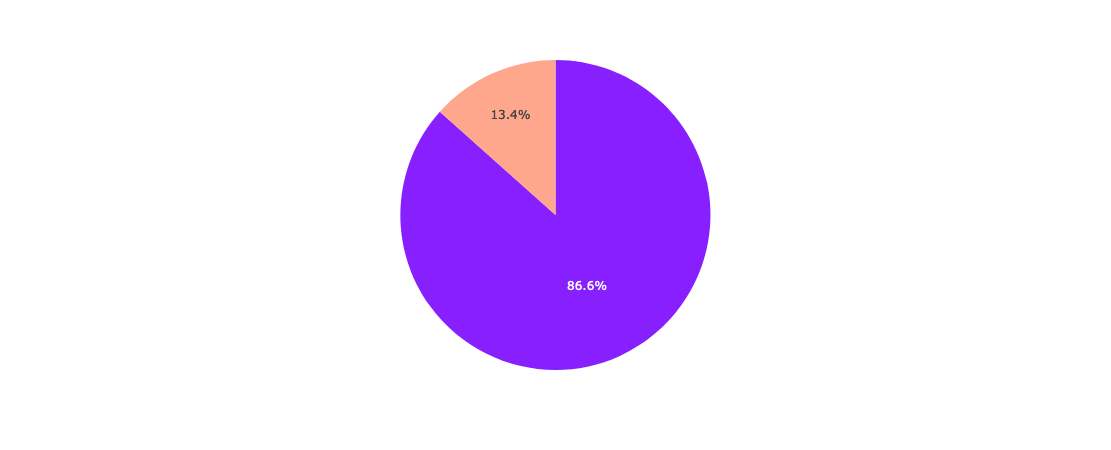

In [8]:
fig = px.pie(df.class_label.value_counts(),labels='index', values='class_label', color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()

In [9]:
#Feature Engineering
df['length'] = df['message'].apply(len)
df.head()

class_label                                            message  length
0         ham  Go until jurong point, crazy.. Available only ...     111
1         ham                      Ok lar... Joking wif u oni...      29
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3         ham  U dun say so early hor... U c already then say...      49
4         ham  Nah I don't think he goes to usf, he lives aro...      61

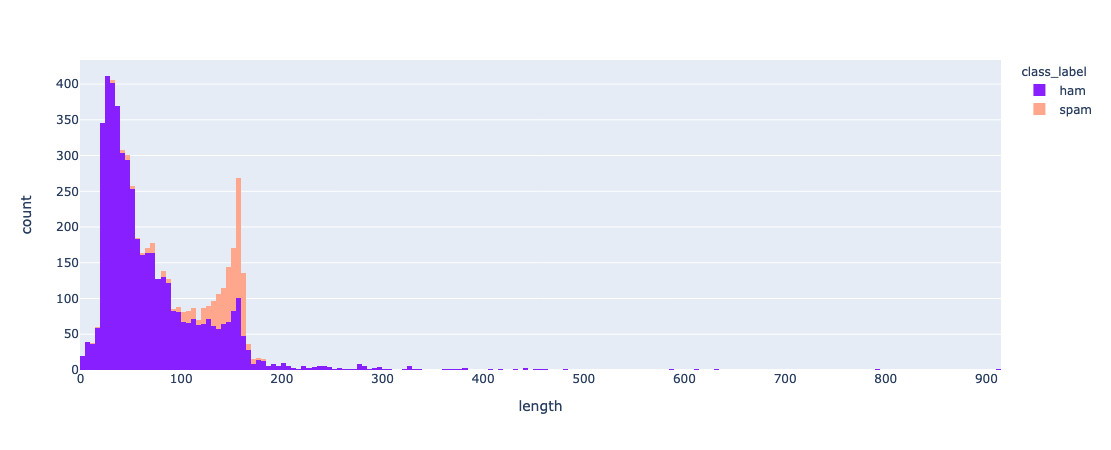

In [10]:
fig = px.histogram(df, x="length", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()

In [11]:
data_ham  = df[df['class_label'] == "ham"].copy()
data_spam = df[df['class_label'] == "spam"].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

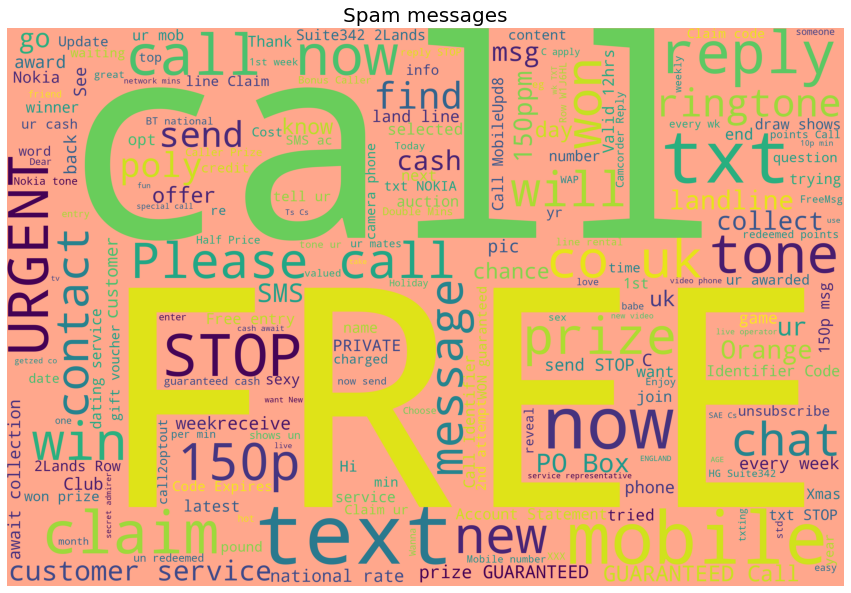

In [12]:
show_wordcloud(data_spam, "Spam messages")

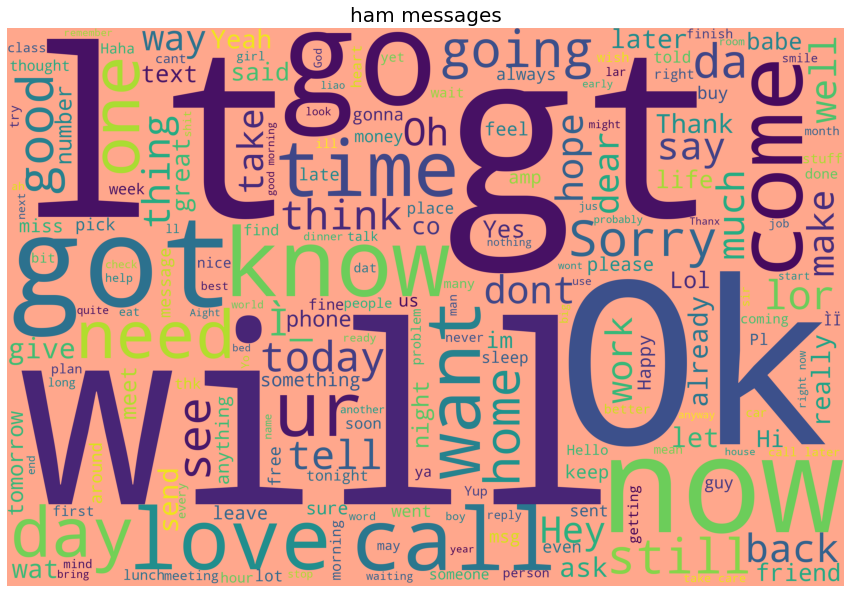

In [13]:
show_wordcloud(data_ham, "ham messages")

In [14]:
df['class_label'] = df['class_label'].map( {'spam': 1, 'ham': 0})

In [15]:
df.head()

class_label                                            message  length
0            0  Go until jurong point, crazy.. Available only ...     111
1            0                      Ok lar... Joking wif u oni...      29
2            1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3            0  U dun say so early hor... U c already then say...      49
4            0  Nah I don't think he goes to usf, he lives aro...      61

In [16]:
### Clean up the message context

# Replace email address with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
df['message'] = df['message'].str.replace(r'£|\$', 'money-symbol')

# Replace 10 digit phone number with 'phone-number'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# Replace normal number with 'number'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
df['message'] = df['message'].str.lower()

In [17]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# remove stop words from message feature
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [19]:
# remove word stems using Snowball stemmer

ss = nltk.SnowballStemmer("english")
df['message'] = df['message'].apply(lambda x: ' '.join(ss.stem(term) for term in x.split()))

In [20]:
df.head()

class_label                                            message  length
0            0  go jurong point crazi avail bugi n great world...     111
1            0                              ok lar joke wif u oni      29
2            1  free entri number wkli comp win fa cup final t...     155
3            0                u dun say earli hor u c alreadi say      49
4            0               nah think goe usf live around though      61

In [21]:
df['message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri number wkli comp win fa cup final t...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbernd time tri number contact u u åmoney sy...
5568                             ì_ b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [22]:
sms_df = df['message']

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
# creating a bag-of-words
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)        

In [25]:
# print total number of words
print('Number of words: {}'.format(len(all_words)))

Number of words: 6526


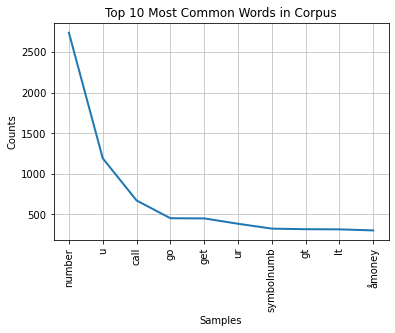

In [26]:
all_words.plot(10, title='Top 10 Most Common Words in Corpus');

In [27]:
all_words.most_common(10)

[('number', 2739),
 ('u', 1192),
 ('call', 672),
 ('go', 453),
 ('get', 451),
 ('ur', 385),
 ('symbolnumb', 325),
 ('gt', 318),
 ('lt', 316),
 ('åmoney', 303)]

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf_model = TfidfVectorizer()

In [30]:
tfidf_vec=tfidf_model.fit_transform(sms_df)

In [31]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(tfidf_model, open("../model/tfidf_model.pkl","wb"))

In [32]:
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

0     1     2     3     4     5     6     7     8     9     ...  6496  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   6497  6498  6499  6500  6501  6502  6503  6504  6505  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 6506 columns]

In [33]:
tfidf_data.shape

(5572, 6506)

In [34]:
### Seprating Columns
df_train = tfidf_data.iloc[:4457]
df_test = tfidf_data.iloc[4457:]

In [35]:
df_train.shape, df_test.shape

((4457, 6506), (1115, 6506))

In [36]:
target = df['class_label']
df_train['class_label'] = target

In [37]:
df_train.head()

0    1    2    3    4    5    6    7    8    9  ...  6497  6498  6499  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   6500  6501  6502  6503  6504  6505  class_label  
0   0.0   0.0   0.0   0.0   0.0   0.0            0  
1   0.0   0.0   0.0   0.0   0.0   0.0            0  
2   0.0   0.0   0.0   0.0   0.0   0.0            1  
3   0.0   0.0   0.0   0.0   0.0   0.0            0  
4   0.0   0.0   0.0   0.0   0.0   0.0            0  

[5 rows x 6507 columns]

In [38]:
Y = df_train['class_label']
X = df_train.drop('class_label',axis=1)

In [39]:
# splitting training data into train and validation using sklearn
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [41]:
import lightgbm as lgb

In [42]:
def train_and_test(model, model_name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('Classification report is:')
    print(classification_report(pred, y_test))
    print('  ')

    print('Confusion Matrix is:')
    print(confusion_matrix(pred, y_test))
    print('  ')  
    print(f'F1 score is: {f1_score(pred, y_test)}')

In [43]:
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    lgbmodel = lgb.LGBMClassifier(max_depth=depth, n_estimators=200, num_leaves=40)
    print(f"Max Depth {depth}")
    print(" ")
    print(" ")
    train_and_test(lgbmodel, "Light GBM")

Max Depth 1
 
 
Classification report is:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       784
           1       0.81      0.98      0.89       108

    accuracy                           0.97       892
   macro avg       0.90      0.97      0.93       892
weighted avg       0.97      0.97      0.97       892

  
Confusion Matrix is:
[[759  25]
 [  2 106]]
  
F1 score is: 0.8870292887029289
Max Depth 2
 
 
Classification report is:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       776
           1       0.86      0.97      0.91       116

    accuracy                           0.98       892
   macro avg       0.93      0.98      0.95       892
weighted avg       0.98      0.98      0.98       892

  
Confusion Matrix is:
[[758  18]
 [  3 113]]
  
F1 score is: 0.9149797570850203
Max Depth 3
 
 
Classification report is:
              precision    recall  f1-score   support

 

In [44]:
from sklearn.model_selection import RandomizedSearchCV

lgbmodel_bst = lgb.LGBMClassifier(max_depth=5, n_estimators=200, num_leaves=40)

    
param_grid = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_freq': [3, 4, 5, 6, 7],
    'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10),
     "min_split_gain": [0.0, 0.1, 0.01],
    "min_child_weight": [0.001, 0.01, 0.1, 0.001],
    "min_child_samples": [20, 30, 25],
    "subsample": [1.0, 0.5, 0.8],
    
}

model = RandomizedSearchCV(lgbmodel_bst, param_grid, random_state=1)
search = model.fit(X_train, y_train)
search.best_params_

{'subsample': 0.5,
 'reg_lambda': 0.47777777777777775,
 'reg_alpha': 0.5722222222222222,
 'num_leaves': 88,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 10,
 'min_child_weight': 0.01,
 'min_child_samples': 30,
 'max_depth': 3,
 'learning_rate': 0.1,
 'bagging_freq': 3,
 'bagging_fraction': 0.6}

In [45]:
best_model = lgb.LGBMClassifier(subsample=0.5,
                             reg_lambda= 0.47777777777777775,
                             reg_alpha= 0.5722222222222222,
                             num_leaves= 88,
                             min_split_gain= 0.01,
                             min_data_in_leaf= 10,
                             min_child_weight= 0.01,
                             min_child_samples= 30,
                             max_depth= 3,
                             learning_rate= 0.1,
                             bagging_freq= 3,
                             bagging_fraction= 0.6,
                              random_state=1)

In [46]:
best_model.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, max_depth=3,
               min_child_samples=30, min_child_weight=0.01, min_data_in_leaf=10,
               min_split_gain=0.01, num_leaves=88, random_state=1,
               reg_alpha=0.5722222222222222, reg_lambda=0.47777777777777775,
               subsample=0.5)

In [47]:
prediction = best_model.predict(X_test)
print('Classification report is:')
print(classification_report(prediction, y_test))
print('  ')
print('Confusion Matrix is:')
print(confusion_matrix(prediction, y_test))
print('  ')  
print(f'F1 score is: {f1_score(prediction, y_test)}')

Classification report is:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       777
           1       0.84      0.96      0.89       115

    accuracy                           0.97       892
   macro avg       0.92      0.96      0.94       892
weighted avg       0.97      0.97      0.97       892

  
Confusion Matrix is:
[[756  21]
 [  5 110]]
  
F1 score is: 0.8943089430894308


In [48]:
### Full Training and Predicting on Final Test Set
best_model.fit(tfidf_data, target)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, max_depth=3,
               min_child_samples=30, min_child_weight=0.01, min_data_in_leaf=10,
               min_split_gain=0.01, num_leaves=88, random_state=1,
               reg_alpha=0.5722222222222222, reg_lambda=0.47777777777777775,
               subsample=0.5)

In [50]:
#serializing our model to a file called model.pkl
pickle.dump(best_model, open("../model/spam_model.pkl","wb"))